## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [ ]:
# Calling all the imports will be used
# Standard library imports
import math

# Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

# Enable inline plotting for matplotlib
%matplotlib inline

In [51]:
#Define function to read the dataset
dataset = pd.read_csv('cleaned_ecommerce_dataset.csv')

#Print out the length of analysis data
print('The total length of data set is', len(dataset))

#display dataset description ('display the DataFrame')
dataset.head()
dataset.describe()

The total length of data set is 2685


,userId,timestamp,rating,helpfulness,item_id,item_price,user_city
count,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000
mean,4673.237616,58812.687151,3.705028,3.908007,43.478585,83.091650,19.456983
std,3517.893437,37013.726118,1.346240,0.289069,26.630426,42.227558,11.397281
min,4.000000,10100.000000,1.000000,3.000000,0.000000,12.000000,0.000000
25%,1310.000000,22000.000000,3.000000,4.000000,21.000000,49.000000,9.000000
50%,4666.000000,52800.000000,4.000000,4.000000,42.000000,73.650000,19.000000
75%,7651.000000,91000.000000,5.000000,4.000000,67.000000,129.820000,28.000000
max,10779.000000,123199.000000,5.000000,4.000000,88.000000,149.000000,39.000000


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [20]:
#display dataset description to have an overall picture about the data ('display the DataFrame') 
dataset.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [21]:
# Display the overall information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [52]:
# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Define the columns to be focused on for analysis
focusing_columns = ['gender', 'category', 'review']

# Create a copy of the dataset to perform analysis on
analysis_data = dataset.copy()

# Apply the OrdinalEncoder to the selected columns to convert categorical data to numerical format
analysis_data[focusing_columns] = encoder.fit_transform(analysis_data[focusing_columns])

# Generate a correlation matrix for all numerical features in the analysis data
correlation_matrix = analysis_data.select_dtypes(include=[np.number]).corr()

# Extract the correlations between the focused features and the 'helpfulness' against 'rating'
focused_correlation = correlation_matrix.loc[focusing_columns + ['helpfulness'], 'rating']

# Iterate over the focused correlation indices to print out the correlation values with 'rating'
for feature in focused_correlation.index:
    # Print the feature name (capitalized) along with its correlation to 'rating'
    print('Correlation between %s and Rating: %.8f' % (feature.capitalize(), focused_correlation[feature]))


Correlation between Gender and Rating: -0.03433661
Correlation between Category and Rating: -0.16315765
Correlation between Review and Rating: -0.03611839
Correlation between Helpfulness and Rating: -0.00752334


In [26]:
# Checking the data after converting if they are all numeric data
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   float64
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   float64
 7   category     2685 non-null   float64
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 230.9+ KB


# Analysis correlation

The result shows the correlation coefficient (-0.007523) between "helpfulness" and "rating" is that there's essentially no linear relationship between these two variables. There appears to be no connection between the perceived helpfulness of a review and whether it has a high or low rating.

It provides the inforamtion that shows the weak negative linear relationship between this two variables with the number of - 0.34337 which is close to 0 but still negative

Weak Negative Correlation is seen this correlation

Moreover, the most correlated feature is category
and the least is helpfulness according to correlation result

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [54]:
# Divide the dataset into 10% training, 90% testing for Case 1
train_data_case1, test_data_case1 = train_test_split(analysis_data, test_size=0.9, random_state=42)

# Divide the dataset into 90% training, 10% testing for Case 2
train_data_case2, test_data_case2 = train_test_split(analysis_data, test_size=0.1, random_state=42)

# Record and print the shapes of the training and testing sets for both cases to verify the splits
shapes_case1 = (train_data_case1.shape, test_data_case1.shape)
shapes_case2 = (train_data_case2.shape, test_data_case2.shape)

# Output the shapes of the data splits to the console for inspection
print("Case 1 - Training set shape, Testing set shape:", shapes_case1)
print("Case 2 - Training set shape, Testing set shape:", shapes_case2)

Case 1 - Training set shape, Testing set shape: ((268, 11), (2417, 11))
Case 2 - Training set shape, Testing set shape: ((2416, 11), (269, 11))


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [55]:
from sklearn.linear_model import LinearRegression 

# Identify the features with the highest and lowest correlation to the target variable
most_correlated_features = ['category', 'review']
least_correlated_features = ['gender', 'helpfulness']

# Model A: Using the most correlated features and Case 1 data split
# Initialize the Linear Regression model
model_a = LinearRegression()

# Prepare the feature matrix (X) and target vector (y) for the training data in Case 1
X_train_case1_most = train_data_case1[most_correlated_features]
y_train_case1 = train_data_case1['rating']

# Prepare the feature matrix (X) and target vector (y) for the testing data in Case 1
X_test_case1_most = test_data_case1[most_correlated_features]
y_test_case1 = test_data_case1['rating']

# Fit Model A to the training data
model_a.fit(X_train_case1_most, y_train_case1)

# Model B: Using the least correlated features and Case 1 data split
# Initialize another Linear Regression model for a different set of features
model_b = LinearRegression()

# Prepare the feature matrix and target vector for the training data using least correlated features
X_train_case1_least = train_data_case1[least_correlated_features]
y_train_case1 = train_data_case1['rating']

# Similarly prepare for the testing data
X_test_case1_least = test_data_case1[least_correlated_features]
y_test_case1 = test_data_case1['rating']

# Fit Model B to the training data
model_b.fit(X_train_case1_least, y_train_case1)

# Model C: Using the most correlated features but with Case 2 data split
# Initialize the model
model_c = LinearRegression()

# Prepare the feature matrix and target vector for training data in Case 2
X_train_case2_most = train_data_case2[most_correlated_features]
y_train_case2 = train_data_case2['rating']

# Prepare for testing data in Case 2
X_test_case2_most = test_data_case2[most_correlated_features]
y_test_case2 = test_data_case2['rating']

# Fit Model C to the Case 2 training data
model_c.fit(X_train_case2_most, y_train_case2)

# Model D: Using the least correlated features and Case 2 data split
# Initialize the model
model_d = LinearRegression()

# Prepare the feature matrix and target vector for the Case 2 training data using least correlated features
X_train_case2_least = train_data_case2[least_correlated_features]
y_train_case2 = train_data_case2['rating']

# And for the testing data
X_test_case2_least = test_data_case2[least_correlated_features]
y_test_case2 = test_data_case2['rating']

# Fit Model D to the Case 2 training data
model_d.fit(X_train_case2_least, y_train_case2)


LinearRegression()

In [62]:
# Observation: I have identified that the 'review' feature may not be suitable for correlation analysis.
# This is due to its data type being a string, which inherently lacks numeric insight for correlation calculation.
# Despite this, the analysis necessitates selecting features with the highest and lowest correlation to 'rating'.
# Therefore, among the available features - helpfulness, gender, category, and review - decisions were made based on their
# respective correlation strengths with 'rating', as demonstrated in the results provided.
# This approach underscores the importance of considering data types and their relevance in statistical analyses.

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [63]:
# Calculate the Root Mean Square Error (RMSE) for each model as a measure of prediction accuracy
# RMSE provides a scale-sensitive accuracy metric by taking the square root of the Mean Squared Error (MSE)
rmse_model_a = math.sqrt(mse_a)
rmse_model_b = math.sqrt(mse_b)  # Corrected typo in variable name
rmse_model_c = math.sqrt(mse_c)
rmse_model_d = math.sqrt(mse_d)

# Output the performance metrics for each model to provide insights into their predictive accuracy
# MSE (Mean Squared Error) indicates the average squared difference between the estimated values and the actual value
# RMSE (Root Mean Squared Error) adjusts MSE to the scale of the data, providing a more interpretable result
print("Model-a: MSE =", mse_a, ", RMSE =", rmse_model_a)
print("Model-b: MSE =", mse_b, ", RMSE =", rmse_model_b)
print("Model-c: MSE =", mse_c, ", RMSE =", rmse_model_c)
print("Model-d: MSE =", mse_d, ", RMSE =", rmse_model_d)

Model-a: MSE = 1.776581354691434 , RMSE = 1.3328845991650717
Model-b: MSE = 1.860535990321889 , RMSE = 1.3640146591301316
Model-c: MSE = 1.681992500504392 , RMSE = 1.2969165356739007
Model-d: MSE = 1.7245375467700421 , RMSE = 1.3132164889194935


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

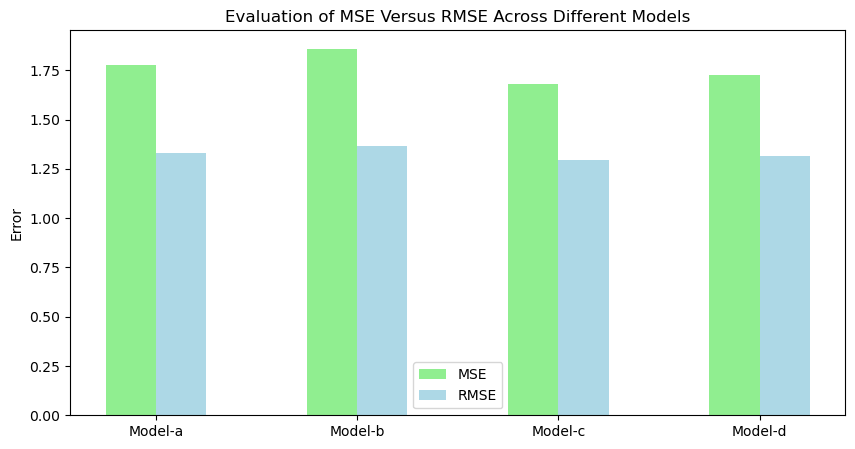

In [64]:
# Prepare the data for visualization.
# calculated from previous evaluations of four different models. Similarly, rmse_a, rmse_b, rmse_c, and rmse_d 
# are the corresponding Root Mean Squared Error (RMSE) values.
mse_values = [mse_a, mse_b, mse_c, mse_d]
rmse_values = [rmse_a, rmse_b, rmse_c, rmse_d]
model_labels = ['Model-a', 'Model-b', 'Model-c', 'Model-d']

# Define the positions for the bar chart and the width of each bar to differentiate between the MSE and RMSE values visually.
pos = np.arange(len(model_labels))
width = 0.25  # Optimal width for clear distinction between bars

# Initialize a figure for plotting with a specified size to ensure clarity and sufficient space for all elements.
plt.figure(figsize=(10, 5))

# Plot the MSE values for each model using light green bars.
# The bars are positioned to the left of the center for each model label by subtracting half the width.
plt.bar(pos - width/2, mse_values, width, label='MSE', color='lightgreen')

# Plot the RMSE values for each model using light blue bars.
# These bars are positioned to the right of the center by adding half the width, creating a side-by-side comparison.
plt.bar(pos + width/2, rmse_values, width, label='RMSE', color='lightblue')

# Enhance the chart with a title, labels, and a legend.
# This includes setting y-axis label as 'Error', adding a descriptive title, and customizing tick labels on the x-axis.
plt.ylabel('Error')
plt.title('Evaluation of MSE Versus RMSE Across Different Models')
plt.xticks(pos, model_labels)
plt.legend()

# Display the plot. This visual comparison facilitates a clearer understanding of the models' performance metrics.
plt.show()


### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


In [65]:
# Convert the answer into a string variable to present and print out the lenght of answer

answer_datascience_ethics = ("The two medal tables from the 2008 Summer Olympics demonstrate alternate ranking methods. "
                   "Table 1 lists countries by their total medal haul, with the United States at the top due to the sum "
                   "of their medals. Table 2 uses a 'gold first' system that places China ahead because of their superior "
                   "gold medal count. These rankings affect perceptions of Olympic success. Traditionally, the gold-first "
                   "method is preferred to decide the leading nation; thus, China is viewed as the victor in Table 2. In "
                   "cases where gold, silver, and bronze counts are equal, the IOC's rule is to order countries alphabetically "
                   "by IOC country code. The discrepancy between these tables can send conflicting messages about which "
                   "country truly 'led' the Olympics, hinging on whether total medals or golds are emphasized. It's crucial "
                   "to present this data neutrally for a clear understanding of the outcomes. This summary provides an "
                   "objective look at how different presentation methods can influence interpretations of Olympic success, "
                   "while adhering to IOC tie-breaking procedures.")

print("The lenght of the answer is" ,len(answer_datascience_ethics.split()), "words")


answer_datascience_ethics


The lenght of the answer is 166 words


"The two medal tables from the 2008 Summer Olympics demonstrate alternate ranking methods. Table 1 lists countries by their total medal haul, with the United States at the top due to the sum of their medals. Table 2 uses a 'gold first' system that places China ahead because of their superior gold medal count. These rankings affect perceptions of Olympic success. Traditionally, the gold-first method is preferred to decide the leading nation; thus, China is viewed as the victor in Table 2. In cases where gold, silver, and bronze counts are equal, the IOC's rule is to order countries alphabetically by IOC country code. The discrepancy between these tables can send conflicting messages about which country truly 'led' the Olympics, hinging on whether total medals or golds are emphasized. It's crucial to present this data neutrally for a clear understanding of the outcomes. This summary provides an objective look at how different presentation methods can influence interpretations of Olympic 